In [15]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def generate_cond2(m, n, rcond):
    rand_gen = np.random.RandomState(42)
    a_l = rand_gen.randn(m, n)
    u, _, vt = np.linalg.svd(a_l, full_matrices=True)
    sigma1 = 1
    sigma_n = sigma1 * rcond
    s = np.logspace(np.log10(sigma_n), np.log10(sigma1), n)
    a_l = (u[:, :N] * s) @ vt
    b_l = rand_gen.randn(m)

    x_l = (vt.T * (1 / s)) @ u[:, :N].T @ b_l
    norm_l = np.linalg.norm(a_l @ x_l - b_l)
    return a_l, b_l, x_l, norm_l

# Create random matrix A
M = 15
N = 10
A, b, x, norm = generate_cond2(M, N, 1)
A, b, x

(array([[ 0.1602747 , -0.05919829,  0.03895652,  0.39391674, -0.04611402,
          0.09857529,  0.37161684,  0.21316215, -0.40517637,  0.08972484],
        [-0.28055414, -0.28649428, -0.02872357, -0.30949684, -0.44328237,
         -0.14167362, -0.31232114,  0.00312096, -0.41409249, -0.15826862],
        [ 0.35745234, -0.08456408, -0.09988586, -0.27084868, -0.28840629,
          0.07655836, -0.23431045,  0.03098462, -0.17490735,  0.18015566],
        [-0.19161864,  0.45833377,  0.04585443, -0.17398767,  0.30514042,
         -0.20858223,  0.05828858, -0.48469687, -0.45190649, -0.15043808],
        [ 0.18816797,  0.04504071,  0.03681761, -0.03856568, -0.13911064,
         -0.29597771, -0.09654838,  0.21042833,  0.36028081, -0.47005862],
        [ 0.10193985, -0.11200494, -0.23421934,  0.14942504,  0.11107517,
          0.21949449, -0.22262815, -0.00951804, -0.0890721 ,  0.29779616],
        [-0.25324117,  0.2442711 , -0.21307546, -0.21732378,  0.34047076,
          0.38166194, -0.0234046

In [17]:
def eksperyment_numeryczny(alpha):

    # Create Ridge regression with an alpha value
    ridgeReg = linear_model.Ridge(alpha=alpha, fit_intercept=False)

    # Create Lasso regression with an alpha value
    lassoReg = linear_model.Lasso(alpha=alpha, fit_intercept=False)

    # Fit the model
    ridgeReg.fit(A, b)
    lassoReg.fit(A, b)

    # Read coefs
    ridgeCoef = ridgeReg.coef_
    lassoCoef = lassoReg.coef_

    # r_r = x - ridgeCoef
    # r_r_norm = np.linalg.norm(r_r)
    #
    # r_l = x - lassoCoef
    # r_l_norm = np.linalg.norm(r_l)
    #
    # print(f"||x_ridge - x|| = {r_r_norm}")
    # print(f"||x_lasso - x|| = {r_l_norm}")

    return ridgeCoef, lassoCoef

In [18]:
alphas = np.logspace(-16, 0, 100)
xs = [eksperyment_numeryczny(alpha) for alpha in alphas]

/home/tudny/Documents/UW/MIMUW/MNUMAD/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.539e-01, tolerance: 1.136e-03
  model = cd_fast.enet_coordinate_descent(
/home/tudny/Documents/UW/MIMUW/MNUMAD/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.824e-02, tolerance: 1.136e-03
  model = cd_fast.enet_coordinate_descent(
/home/tudny/Documents/UW/MIMUW/MNUMAD/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

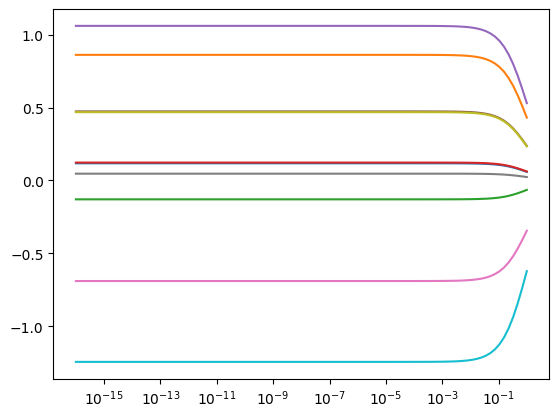

In [19]:
ridge_xs = [x[0] for x in xs]
for i in range(N):
    plt.plot(alphas, [x[i] for x in ridge_xs], label=f"ridge {i}")
plt.xscale("log")
plt.show()

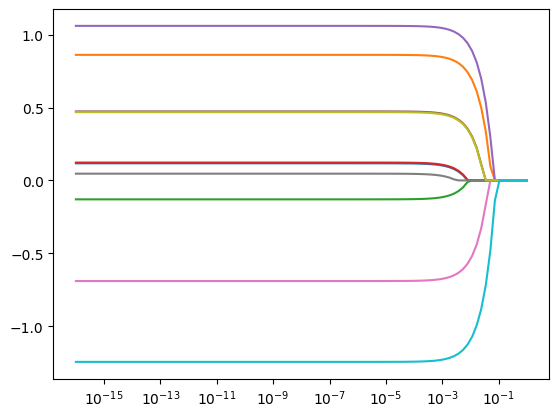

In [20]:
lasso_xs = [x[1] for x in xs]
for i in range(N):
    plt.plot(alphas, [x[i] for x in lasso_xs], label=f"lasso {i}")
plt.xscale("log")
plt.show()

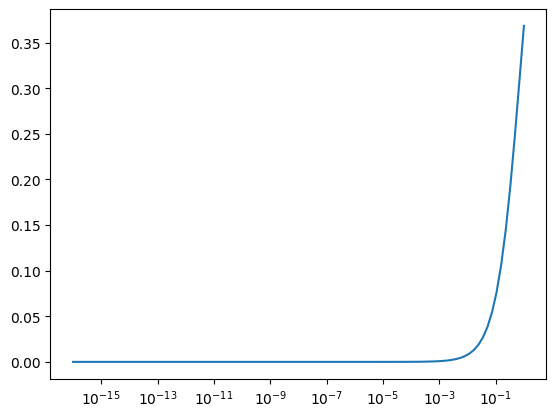

In [21]:
ridge_rs = [b - A @ x for x in ridge_xs]
ridge_delta = [np.linalg.norm(A.T @ r, ord=2) / np.linalg.norm(r, ord=2) for r in ridge_rs]

plt.plot(alphas, ridge_delta, label=f"ridge")
plt.xscale("log")
plt.show()

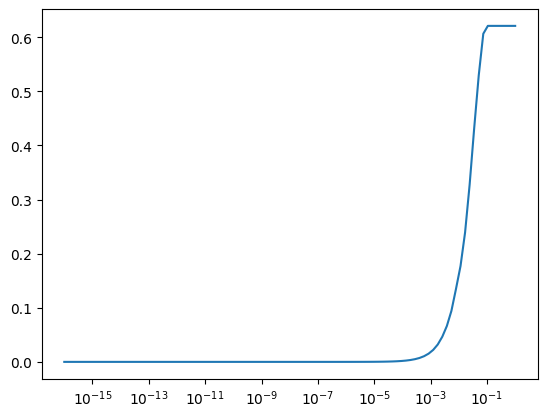

In [22]:
lasso_rs = [b - A @ x for x in lasso_xs]
lasso_delta = [np.linalg.norm(A.T @ r, ord=2) / np.linalg.norm(r, ord=2) for r in lasso_rs]

plt.plot(alphas, lasso_delta, label=f"ridge")
plt.xscale("log")
plt.show()

In [23]:
from sklearn import datasets

In [24]:
A, b = datasets.load_diabetes(return_X_y=True)

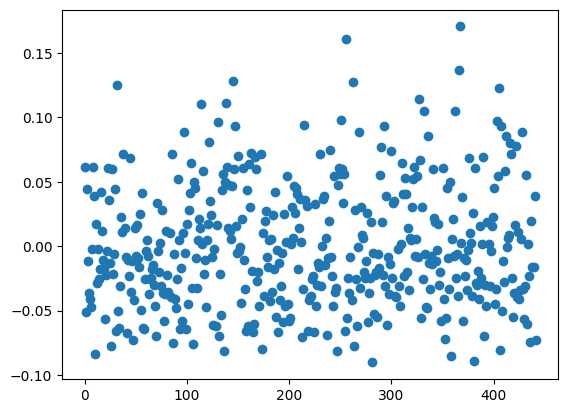

In [25]:
plt.plot(A[:, 2], 'o')

In [26]:
# Given dataset A[:, 2] using Linear Regression find best fitting curve
data = A[:, 2]
x = np.arange(len(data))
y = data

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression()

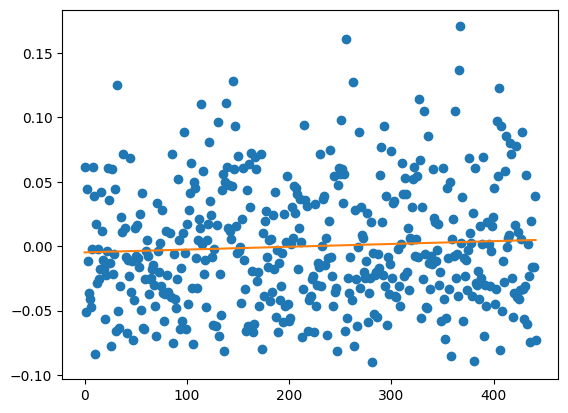

In [28]:
y_pred = model.predict(x.reshape(-1, 1))
plt.plot(x, y, 'o')
plt.plot(x, y_pred)